The aim of this notebook is to implement logistic regression using as few libraries as possible

In [19]:
import math  # For basic calculations
import matplotlib.pyplot as plt  # For visualization
import numpy as np  # For handling arrays
import pandas as pd  # For handling dataset

In [20]:
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# Function to compute logistic regression coefficients using gradient descent
def logistic_regression(x, y, learning_rate=0.01, epochs=1000):
    b0, b1 = 0, 0  # Initialize coefficients
    n = len(x)
    for _ in range(epochs):
        predictions = [sigmoid(b0 + b1 * xi) for xi in x]
        error = [yi - pi for yi, pi in zip(y, predictions)]
        b0 += learning_rate * sum(error) / n
        b1 += learning_rate * sum(ei * xi for ei, xi in zip(error, x)) / n
    return b0, b1

def predict(x, b0, b1):
    return [sigmoid(b0 + b1 * xi) for xi in x]

In [21]:
# Generate random dataset (Hours Studied vs. Pass/Fail)
n = 75  # Number of data points
np.random.seed(42)
x_values = np.random.uniform(1, 10, n)  # Random hours studied between 1 and 10
y_values = [1 if xi + np.random.normal(0, 2) > 5 else 0 for xi in x_values]  # Pass (1) or Fail (0)

# Compute coefficients
b0, b1 = logistic_regression(x_values, y_values)
print(f"Logistic Regression Equation: P(Y=1) = 1 / (1 + e^(-({b0:.2f} + {b1:.2f}x)))")



Logistic Regression Equation: P(Y=1) = 1 / (1 + e^(-(-1.24 + 0.35x)))


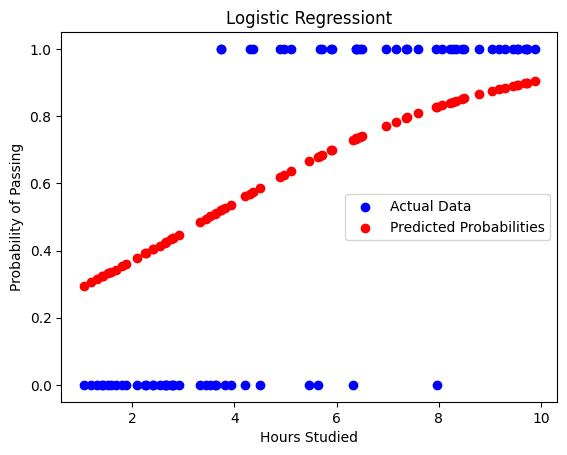

Model Accuracy: 0.85


In [22]:
# Make predictions
predictions = predict(x_values, b0, b1)
classified_predictions = [1 if p >= 0.5 else 0 for p in predictions]


# Plot the results
plt.scatter(x_values, y_values, color='blue', label='Actual Data')
plt.scatter(x_values, predictions, color='red', label='Predicted Probabilities')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regressiont")
plt.legend()
plt.show()

# Compute accuracy
accuracy = sum(1 for yi, pi in zip(y_values, classified_predictions) if yi == pi) / n
print(f"Model Accuracy: {accuracy:.2f}")